In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.utils import resample
import time

In [30]:
#inherently multiclass:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#multiclass as One-vs-One:
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier #set multi_class="one_vs_one"

#multiclass as One-Vs-All:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

In [31]:
df = pd.read_csv('summits.csv')

In [32]:
df.head()

,summit_id,name,elevation,isolation,prominence,latitude,longtitude,type,county,state,type_str
0,127239,Sugarloaf Mountain,1686,3.91,456,40.9892,-76.0999,1,Luzerne County,PA,mountain
1,127316,Pisgah Mountain,1630,1.12,440,40.8190,-75.8776,1,Carbon County,PA,mountain
2,128185,Neversink Mountain,910,1.78,380,40.3221,-75.8935,1,Berks County,PA,mountain
3,128403,Brown Mountain,1650,5.06,500,37.6825,-90.5994,1,St. Francois County,MO,mountain
4,128409,Iron Mountain,1450,1.53,320,37.7117,-90.6258,1,St. Francois County,MO,mountain


In [33]:
df.describe()

,summit_id,elevation,isolation,prominence,latitude,longtitude,type
count,7161.000000,7161.000000,7161.000000,7161.000000,7161.000000,7161.000000,7161.000000
mean,37304.794721,7908.568636,6.800684,979.683564,40.689097,-109.237312,1.226924
std,36172.524064,3473.372840,32.550516,997.916193,5.338425,12.535906,0.641908
min,1.000000,65.000000,0.040000,5.000000,-14.233000,-169.454100,0.000000
25%,6345.000000,5269.000000,1.440000,395.000000,37.265800,-117.084000,1.000000
50%,24570.000000,8072.000000,2.590000,680.000000,39.760400,-110.773000,1.000000
75%,55257.000000,10589.000000,5.140000,1191.000000,44.520200,-105.891600,2.000000
max,213111.000000,19470.000000,1649.810000,13222.000000,67.938700,-68.004900,2.000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7161 entries, 0 to 7160
Data columns (total 11 columns):
summit_id     7161 non-null int64
name          7161 non-null object
elevation     7161 non-null int64
isolation     7161 non-null float64
prominence    7161 non-null int64
latitude      7161 non-null float64
longtitude    7161 non-null float64
type          7161 non-null int64
county        7161 non-null object
state         7161 non-null object
type_str      7161 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 615.5+ KB


In [35]:
X = df[['elevation','isolation', 'prominence']]
X.describe()

,elevation,isolation,prominence
count,7161.000000,7161.000000,7161.000000
mean,7908.568636,6.800684,979.683564
std,3473.372840,32.550516,997.916193
min,65.000000,0.040000,5.000000
25%,5269.000000,1.440000,395.000000
50%,8072.000000,2.590000,680.000000
75%,10589.000000,5.140000,1191.000000
max,19470.000000,1649.810000,13222.000000


In [36]:
y = df['type']

In [9]:
mountain_mask = df.type_str == 'mountain'
mount_mask = df.type_str == 'mount'
peak_mask = df.type_str == 'peak'

In [10]:
X[mountain_mask].describe()

,elevation,isolation,prominence
count,3842.000000,3842.000000,3842.000000
mean,7173.062728,5.055534,852.653306
std,3409.325776,13.644105,691.726491
min,305.000000,0.190000,5.000000
25%,4255.000000,1.600000,391.000000
50%,7294.000000,2.760000,650.000000
75%,9776.250000,4.970000,1116.000000
max,14165.000000,436.320000,8289.000000


In [11]:
X[mount_mask].describe()

,elevation,isolation,prominence
count,847.000000,847.000000,847.00000
mean,8793.789847,14.950874,1381.90673
std,3827.438169,85.239404,1668.30822
min,65.000000,0.200000,24.00000
25%,5895.000000,1.335000,444.00000
50%,8979.000000,2.350000,785.00000
75%,12387.500000,5.935000,1692.50000
max,18008.000000,1649.810000,13222.00000


In [12]:
X[peak_mask].describe()

,elevation,isolation,prominence
count,2472.000000,2472.000000,2472.000000
mean,8748.387136,6.720449,1039.298139
std,3171.589680,16.298795,1051.079800
min,931.000000,0.040000,6.000000
25%,6523.250000,1.250000,383.000000
50%,8860.000000,2.390000,689.500000
75%,11180.000000,5.242500,1251.000000
max,19470.000000,290.690000,8304.000000


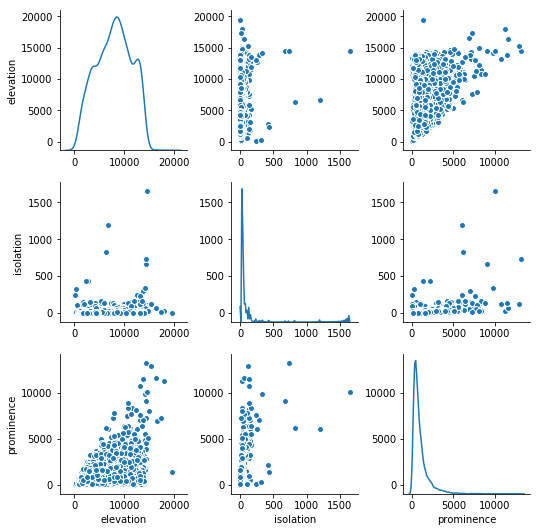

In [13]:
sns.pairplot(df[['type_str', 'elevation', 'isolation', 'prominence']], diag_kind='kde')

In [14]:
def print_numsummits(df):
    num_mountains = len(df[(df['type_str'] == 'mountain')]['summit_id'].unique())
    num_mounts = len(df[(df['type_str'] == 'mount')]['summit_id'].unique())
    num_peaks = len(df[(df['type_str'] == 'peak')]['summit_id'].unique())
    print("#mountains={}. #mounts={}, #peaks={}, total={}".format(num_mountains, num_mounts, num_peaks, num_mountains+num_mounts+num_peaks))

Per GridSearchCV docs, with cv=integer and y is multiclass, then StratifiedKFold cross-validation is used, i.e. the folds are made by preserving the percentage of samples for each class.

Per LogisticRegression docs: Multiclass option can be either ‘ovr’ or ‘multinomial’. If the option chosen is ‘ovr’, then a binary problem is fit for each label. Else the loss minimised is the multinomial loss fit across the entire probability distribution. Does not work for liblinear solver.

In [15]:
def run_logistic(X, y, df, solver, multiclass, classweights):
    print_numsummits(df)
    print()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    pipe = Pipeline(steps=[('scaler', StandardScaler()), ('logistic', LogisticRegression())])
    gs = GridSearchCV(estimator=pipe, param_grid={'logistic__random_state': [1], 'logistic__max_iter': [1000], 'logistic__multi_class': multiclass, 'logistic__solver': solver, 'logistic__class_weight': classweights}, cv=10, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("TRAIN gs.best_score_={}\ngs.best_params_:\n{}\n".format(gs.best_score_, gs.best_params_))
    
    clf = gs.best_estimator_
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("best_estimator TEST score: {}\n".format(clf.score(X_test, y_test)))
    
    print("classification report:\n{}\n".format(classification_report(y_test, y_pred))) # The support is the number of occurrences of each class in y_true.

#     print("best estimator parameters:\n{}\n".format(clf.get_params()))
    
    return clf, y_pred, X_train, X_test, y_train, y_test

In [16]:
solver = ['lbfgs', 'sag', 'saga', 'newton-cg'] #{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
multiclass = ['ovr', 'multinomial']
classweights = [None, 'balanced']
clf, y_pred, X_train, X_test, y_train, y_test = run_logistic(X, y, df, solver, multiclass, classweights)

#mountains=3842. #mounts=847, #peaks=2472, total=7161

TRAIN gs.best_score_=0.5642458100558659
gs.best_params_:
{'logistic__class_weight': None, 'logistic__max_iter': 1000, 'logistic__multi_class': 'multinomial', 'logistic__random_state': 1, 'logistic__solver': 'lbfgs'}

best_estimator TEST score: 0.540125610607118

classification report:
             precision    recall  f1-score   support

          0       0.31      0.03      0.05       159
          1       0.58      0.86      0.69       748
          2       0.42      0.25      0.31       526

avg / total       0.49      0.54      0.48      1433




In [17]:
clf.get_params()

{'logistic': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=1000, multi_class='multinomial',
           n_jobs=1, penalty='l2', random_state=1, solver='lbfgs',
           tol=0.0001, verbose=0, warm_start=False),
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__max_iter': 1000,
 'logistic__multi_class': 'multinomial',
 'logistic__n_jobs': 1,
 'logistic__penalty': 'l2',
 'logistic__random_state': 1,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False,
 'memory': None,
 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'steps': [('scaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('logistic',
   LogisticRegression(C=1.0, class_weig

In [18]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

array([[  4,  85,  70],
       [  1, 640, 107],
       [  8, 388, 130]])

In [19]:
y_all_pred = clf.predict(X)
conf_matrix = confusion_matrix(y_true=y, y_pred=y_all_pred)
conf_matrix


array([[  17,  519,  311],
       [   2, 3333,  507],
       [  12, 1800,  660]])

In [20]:
#INTERPRETATION OF CONFUSION MATRIX:

#          mount  mountain  peak
#mount     <--predicted values->
#mountain  <--predicted values->
#peak      <--predicted values->

#If you summed across each row, the sum is number predicted for each row class, e.g. 14 + 517 + 316 = 847 mounts.
#There are 847 mounts in the data, so 14 mounts were predicted to be mounts,
#  517 mounts were predicted to be mountains, and 316 mounts were predicted to be peaks.

#If you sum along each column, the sum is total number predicted of each class predicted, e.g. 14 + 1 + 4 = 19, i.e.
# the regression predicted only 19 of the rows were mounts, when in fact there are 847 mounts.

In [21]:
clf.predict_proba(X)

array([[ 0.05952012,  0.75925688,  0.181223  ],
       [ 0.05829457,  0.76271887,  0.17898657],
       [ 0.05336513,  0.78233701,  0.16429786],
       ..., 
       [ 0.10614863,  0.62079629,  0.27305508],
       [ 0.0714692 ,  0.72169587,  0.20683493],
       [ 0.11734719,  0.47049403,  0.41215878]])

In [22]:
#liblinear cannot be run with multi_class=multinomial (used in GridSearch above), so run it here to compare performance
solver = ['liblinear']
multiclass = ['ovr']
classweights = [None, 'balanced']

clf, y_pred, X_train, X_test, y_train, y_test = run_logistic(X, y, df, solver, multiclass, classweights)


#mountains=3842. #mounts=847, #peaks=2472, total=7161

TRAIN gs.best_score_=0.5640712290502793
gs.best_params_:
{'logistic__class_weight': None, 'logistic__max_iter': 1000, 'logistic__multi_class': 'ovr', 'logistic__random_state': 1, 'logistic__solver': 'liblinear'}

best_estimator TEST score: 0.5422191207257502

classification report:
             precision    recall  f1-score   support

          0       0.33      0.02      0.04       159
          1       0.57      0.86      0.69       748
          2       0.44      0.25      0.32       526

avg / total       0.50      0.54      0.48      1433




In [23]:
df_mountain = df[mountain_mask]
df_mount = df[mount_mask]
df_peak = df[peak_mask]
df_mountain.summit_id.count(), df_mount.summit_id.count(), df_peak.summit_id.count()

(3842, 847, 2472)

In [24]:
max_id = df.summit_id.max() + 1
max_id

213112

In [25]:
num_mount_samples = df_mountain.summit_id.count() - df_mount.summit_id.count()
num_peak_samples = df_mountain.summit_id.count() - df_peak.summit_id.count()

df_mount_upsample = resample(df_mount, replace=True, random_state=1, n_samples=num_mount_samples)
df_peak_upsample = resample(df_peak, replace=True, random_state=1, n_samples=num_peak_samples)
print("df_mount_upsample.count()={}, df_peak_upsample.count()={}".format(df_mount_upsample.summit_id.count(), df_peak_upsample.summit_id.count()))

#add new summit_id's for upsampled data--specific values adon't matter--just add unused summit_id's
last_mount_id = max_id + num_mount_samples
mount_upsample_summit_id = np.arange(max_id, last_mount_id)
peak_upsample_summit_id = np.arange(last_mount_id, last_mount_id + num_peak_samples)

df_mount_upsample['summit_id'] = mount_upsample_summit_id
df_peak_upsample['summit_id'] = peak_upsample_summit_id

print("df_mount_upsample.summit_id: min={}, max={}; df_peak_upsample.summit_id: min={}, max={}".format(df_mount_upsample.summit_id.min(), df_mount_upsample.summit_id.max(), df_peak_upsample.summit_id.min(), df_peak_upsample.summit_id.max()))

df_mount_upsample.count()=2995, df_peak_upsample.count()=1370
df_mount_upsample.summit_id: min=213112, max=216106; df_peak_upsample.summit_id: min=216107, max=217476


/home/ed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/ed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
df_upsampled = pd.concat([df_mountain, df_mount, df_mount_upsample, df_peak, df_peak_upsample])

df_upsampled.describe()

,summit_id,elevation,isolation,prominence,latitude,longtitude,type
count,11526.000000,11526.000000,11526.000000,11526.000000,11526.000000,11526.000000,11526.000000
mean,104710.909682,8195.444734,8.939183,1096.831338,40.959328,-109.876158,1.000000
std,90929.152395,3562.369221,50.440237,1218.098534,5.466144,12.908900,0.816532
min,1.000000,65.000000,0.040000,5.000000,-14.233000,-169.454100,0.000000
25%,17102.250000,5541.000000,1.380000,406.000000,37.402050,-118.239000,0.000000
50%,67393.000000,8316.500000,2.560000,709.000000,39.866900,-111.215250,1.000000
75%,214594.750000,11059.000000,5.380000,1311.500000,44.712375,-106.005300,2.000000
max,217476.000000,19470.000000,1649.810000,13222.000000,67.938700,-68.004900,2.000000


In [27]:
X_up = df_upsampled[['elevation','isolation', 'prominence']]
y_up = df_upsampled['type']
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.20, random_state=1)
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('logistic', LogisticRegression(random_state=10, max_iter=1000))])

In [28]:
solver = ['lbfgs', 'sag', 'saga', 'newton-cg'] #{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’
multiclass = ['ovr', 'multinomial']
classweights = [None, 'balanced']
clf, y_pred, X_train, X_test, y_train, y_test = run_logistic(X_up, y_up, df_upsampled, solver, multiclass, classweights)


#mountains=3842. #mounts=3842, #peaks=3842, total=11526

TRAIN gs.best_score_=0.4163774403470716
gs.best_params_:
{'logistic__class_weight': 'balanced', 'logistic__max_iter': 1000, 'logistic__multi_class': 'multinomial', 'logistic__random_state': 1, 'logistic__solver': 'lbfgs'}

best_estimator TEST score: 0.417172593235039

classification report:
             precision    recall  f1-score   support

          0       0.43      0.30      0.35       754
          1       0.45      0.53      0.49       797
          2       0.37      0.42      0.40       755

avg / total       0.42      0.42      0.41      2306




In [29]:
#RESULTS FROM BEFORE UPSAMPLING:

#             precision    recall  f1-score   support
#
#   mountain       1.00      0.04      0.07       158
#      mount       0.59      0.83      0.69       779
#       peak       0.44      0.30      0.36       496
#
#avg / total       0.58      0.56      0.51      1433

#With upsampling, precision mostly better, recall and f1-score mixed

In [30]:
#liblinear cannot be run with multi_class=multinomial (used in GridSearch above), so run it here to compare performance
solver = ['liblinear']
multiclass = ['ovr']
classweights = [None, 'balanced']
clf, y_pred, X_train, X_test, y_train, y_test = run_logistic(X_up, y_up, df_upsampled, solver, multiclass, classweights)

#mountains=3842. #mounts=3842, #peaks=3842, total=11526

TRAIN gs.best_score_=0.41431670281995664
gs.best_params_:
{'logistic__class_weight': 'balanced', 'logistic__max_iter': 1000, 'logistic__multi_class': 'ovr', 'logistic__random_state': 1, 'logistic__solver': 'liblinear'}

best_estimator TEST score: 0.4176062445793582

classification report:
             precision    recall  f1-score   support

          0       0.44      0.30      0.36       754
          1       0.45      0.53      0.49       797
          2       0.37      0.41      0.39       755

avg / total       0.42      0.42      0.41      2306




In [37]:
names = ['LogisticRegression', 'LogisticRegression--liblinear/ovr', 'DecisionTreeClassifier', 'GaussianNB',
         'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis',
         'LinearSVC', 'MLPClassifier', 'RandomForestClassifier', 'SVC',
         'GradientBoostingClassifier', 'SGDClassifier', 'Perceptron'] #'RadiusNeighborsClassifier', 'GaussianProcessClassifier', 

classifiers = [
    LogisticRegression(random_state=1, max_iter=1000),
    LogisticRegression(random_state=1, max_iter=1000, multi_class='ovr', solver='liblinear'),
    DecisionTreeClassifier(random_state=1),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LinearSVC(random_state=1),
    MLPClassifier(),
#     RadiusNeighborsClassifier(),
    RandomForestClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    SGDClassifier(),
    Perceptron()
#     GaussianProcessClassifier(random_state=1, multi_class="one_vs_one")
]

params=[
    {'multi_class': ['ovr', 'multinomial'],
         'solver': ['lbfgs', 'sag', 'saga', 'newton-cg'], 
         'class_weight': [None, 'balanced']}, #LogisticRegression
    
    {'class_weight': [None, 'balanced']}, #LogisticRegression: liblinear/ovr
    {}, #DecisionTreeClassifier
    {}, #GaussianNB
    {'solver': ['svd', 'lsqr', 'eigen']}, #LinearDiscriminantAnalysis
    {}, #QuadraticDiscriminantAnalysis
    {'multi_class': ['ovr', 'crammer_singer'], 'class_weight': [None, 'balanced']}, #LinearSVC
    {}, #MLPClassifier
#     {}, #RadiusNeighborsClassifier
    {}, #RandomForestClassifier
    {}, #SVC
    {'loss': ['deviance'], 'n_estimators': [50,100,200], 'max_depth': [2,3,5,7], 'criterion': ['friedman_mse'], 'max_features': [None, 'auto', 'sqrt', 'log2']}, #GradientBoostingClassifier
    {}, #SGDClassifier
    {} #Perceptron
#     {'optimizer': [None, 'fmin_l_bfgs_b']} #GaussianProcessClassifier
]


In [38]:
def run_(X, y, df):
    print_numsummits(df)
    print()
    scalar = StandardScaler(copy=True, with_mean=True, with_std=True)
    scalar.fit(X)
    X = scalar.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
    
    best_test_score = -999.9
    worst_test_score = 999.9
    best_estimator = ''
#     worst_estimator = ''
#     best_estimator_seconds = 0
#     worst_estimator_seconds = 0
#     best_params = {}
#     worst_params = {}
    longest_time = -1
#     longest_time_estimator =''
    for i in range(len(params)):
#     for i in range(2):
        print("=============================== {}. {} ==================================".format(i+1, names[i]))
        start_time = time.time()
        gs = GridSearchCV(estimator=classifiers[i], param_grid=params[i], cv=10, n_jobs=-1)
        gs = gs.fit(X_train, y_train)
        seconds = time.time() - start_time
        if seconds > longest_time:
            longest_time = seconds
            longest_time_estimator = names[i]
            
        print("TRAIN best_score_={}\n\n".format(gs.best_score_))
        if params[i] == {}:
            cur_params = "default params used"
        else:
            cur_params = "best_params_:{}".format(gs.best_params_)
        print(cur_params)
        print("#seconds={}\n".format(seconds))

        clf = gs.best_estimator_
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        test_score = clf.score(X_test, y_test)
        if test_score > best_test_score:
            second_best_estimator = best_estimator
            second_best_score = best_test_score 
            best_test_score = test_score
            best_estimator = names[i]
            best_params = cur_params
            best_estimator_seconds = seconds
        if test_score < worst_test_score:
            worst_test_score = test_score
            worst_estimator = names[i]
            worst_params = cur_params
            worst_estimator_seconds = seconds
            
        print("{}'s best_estimator TEST score: {}\n".format(names[i], test_score))

        print("classification report:\n{}\n".format(classification_report(y_test, y_pred))) 
        #     print("best estimator parameters:\n{}\n".format(clf.get_params()))
    
    print()
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("=============================== SUMMARY ==================================")    
    print("best_estimator={}\n#seconds={}\nbest_params={}\nbest_test_score={}".format(best_estimator, best_estimator_seconds, best_params, best_test_score))
    print("\nestimator that took most time: {}, seconds: {}".format(longest_time_estimator, longest_time))
    print("\nsecond_best_estimator: {}, second_best_score: {}".format(second_best_estimator, second_best_score))
    print("\nworst_estimator={}, #seconds={}, worst_params={}, worst_test_score={}".format(worst_estimator, worst_estimator_seconds, worst_params, worst_test_score))
    
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
#     return clf, y_pred, X_train, X_test, y_train, y_test

In [39]:
run_(X, y, df);

#mountains=3842. #mounts=847, #peaks=2472, total=7161

=============================== 1. LogisticRegression ==================================
TRAIN best_score_=0.5642458100558659


best_params_:{'class_weight': None, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
#seconds=3.297621011734009

LogisticRegression's best_estimator TEST score: 0.540125610607118

classification report:
             precision    recall  f1-score   support

          0       0.31      0.03      0.05       159
          1       0.58      0.86      0.69       748
          2       0.42      0.25      0.31       526

avg / total       0.49      0.54      0.48      1433


=============================== 2. LogisticRegression--liblinear/ovr ==================================
TRAIN best_score_=0.5640712290502793


best_params_:{'class_weight': None}
#seconds=0.246870756149292

LogisticRegression--liblinear/ovr's best_estimator TEST score: 0.5422191207257502

classification report:
             precision    recall

/home/ed/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ed/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ed/anaconda3/lib/p

TRAIN best_score_=0.5331703910614525


default params used
#seconds=0.3336653709411621

SGDClassifier's best_estimator TEST score: 0.5394277739009072

classification report:
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       159
          1       0.55      0.95      0.70       748
          2       0.46      0.12      0.19       526

avg / total       0.45      0.54      0.43      1433


=============================== 13. Perceptron ==================================


/home/ed/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/ed/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/ed/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default t

TRAIN best_score_=0.4689245810055866


default params used
#seconds=0.23596620559692383

Perceptron's best_estimator TEST score: 0.5094207955338451

classification report:
             precision    recall  f1-score   support

          0       0.20      0.25      0.22       159
          1       0.58      0.82      0.68       748
          2       0.44      0.15      0.22       526

avg / total       0.49      0.51      0.46      1433



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
=============================== SUMMARY ==================================
best_estimator=GradientBoostingClassifier
#seconds=62.612205505371094
best_params=best_params_:{'criterion': 'friedman_mse', 'loss': 'deviance', 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100}
best_test_score=0.5589672016748081

estimator that took most time: GradientBoostingClassifier, seconds: 62.612205505371094

second_best_estimator: SVC, second_best_score: 0.5512909979064898

worst_estim

/home/ed/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
